In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/


In [76]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

noTune = False
MECTune = True


#Data and Ext endings currently changed
#ending = "Dec19_noTune"
ending = "Dec19_MECTune"

In [77]:
if isRun3 == False and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    print(nue_nue_allsel_vars_tot)
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################

    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")
    

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    #print(nue_data_vars_tot)

    ###############################################################

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)
        
        
    ###############################################################

    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot.pop("Unnamed: 0")
    numu_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_weights_tot[c][0]) > 2:
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][1:]
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][:-1]
            numu_nue_weights_tot[c][0] = list(map(float,numu_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_vars_tot[c][0]) > 2:
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][1:]
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][:-1]
            numu_nue_vars_tot[c][0] = list(map(float,numu_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot.pop(i)
        numu_nue_weights_tot.pop(i) 
    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    
elif isRun3 == True and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################

    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    print(nue_data_vars_tot)

    ###############################################################

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)
        
        
    ###############################################################

    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot.pop("Unnamed: 0")
    numu_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_weights_tot[c][0]) > 2:
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][1:]
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][:-1]
            numu_nue_weights_tot[c][0] = list(map(float,numu_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_vars_tot[c][0]) > 2:
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][1:]
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][:-1]
            numu_nue_vars_tot[c][0] = list(map(float,numu_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot.pop(i)
        numu_nue_weights_tot.pop(i)
    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    
elif isCombined == True:
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run1 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run1 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_weights_tot_run1[c][0]) > 2:
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][1:]
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][:-1]
            nue_nue_allsel_weights_tot_run1[c][0] = list(map(float,nue_nue_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_vars_tot_run1[c][0]) > 2:
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][1:]
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][:-1]
            nue_nue_allsel_vars_tot_run1[c][0] = list(map(float,nue_nue_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run1.pop(i)
        nue_nue_allsel_weights_tot_run1.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run1 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run1 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run1.pop("Unnamed: 0")
    nue_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_weights_tot_run1[c][0]) > 2:
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][1:]
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][:-1]
            nue_mc_weights_tot_run1[c][0] = list(map(float,nue_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_vars_tot_run1[c][0]) > 2:
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][1:]
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][:-1]
            nue_mc_vars_tot_run1[c][0] = list(map(float,nue_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run1.pop(i)
        nue_mc_weights_tot_run1.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run1 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run1= nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run1.pop("Unnamed: 0")
    nue_dirt_weights_tot_run1.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_weights_tot_run1[c][0]) > 2:
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][1:]
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][:-1]
            nue_dirt_weights_tot_run1[c][0] = list(map(float,nue_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_vars_tot_run1[c][0]) > 2:
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][1:]
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][:-1]
            nue_dirt_vars_tot_run1[c][0] = list(map(float,nue_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run1.pop(i)
        nue_dirt_weights_tot_run1.pop(i)

    #print(nue_dirt_vars_tot_run1)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run1 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run1 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run1.pop("Unnamed: 0")
    nue_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run1 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run1 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run1.pop("Unnamed: 0")
    nue_data_weights_tot_run1.pop("Unnamed: 0")
    

    ###############################################################
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run1 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run1 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_weights_tot_run1[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][1:]
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][:-1]
            nue_nue_sigsel_weights_tot_run1[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_vars_tot_run1[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][1:]
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][:-1]
            nue_nue_sigsel_vars_tot_run1[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run1.pop(i)
        nue_nue_sigsel_weights_tot_run1.pop(i)
     
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run1 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run1 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_weights_tot_run1[c][0]) > 2:
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][1:]
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][:-1]
            numu_mc_allsel_weights_tot_run1[c][0] = list(map(float,numu_mc_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_vars_tot_run1[c][0]) > 2:
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][1:]
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][:-1]
            numu_mc_allsel_vars_tot_run1[c][0] = list(map(float,numu_mc_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run1.pop(i)
        numu_mc_allsel_weights_tot_run1.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run1 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run1 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_weights_tot_run1[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][1:]
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][:-1]
            numu_mc_sigsel_weights_tot_run1[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_vars_tot_run1[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][1:]
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][:-1]
            numu_mc_sigsel_vars_tot_run1[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run1.pop(i)
        numu_mc_sigsel_weights_tot_run1.pop(i)
    
    ###########################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run1 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run1 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run1.pop("Unnamed: 0")
    numu_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_weights_tot_run1[c][0]) > 2:
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][1:]
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][:-1]
            numu_nue_weights_tot_run1[c][0] = list(map(float,numu_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_vars_tot_run1[c][0]) > 2:
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][1:]
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][:-1]
            numu_nue_vars_tot_run1[c][0] = list(map(float,numu_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run1.pop(i)
        numu_nue_weights_tot_run1.pop(i) 
        

    ###############################################################
    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run1 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run1 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run1.pop("Unnamed: 0")
    numu_dirt_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_weights_tot_run1[c][0]) > 2:
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][1:]
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][:-1]
            numu_dirt_weights_tot_run1[c][0] = list(map(float,numu_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_vars_tot_run1[c][0]) > 2:
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][1:]
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][:-1]
            numu_dirt_vars_tot_run1[c][0] = list(map(float,numu_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run1.pop(i)
        numu_dirt_weights_tot_run1.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run1 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run1 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run1.pop("Unnamed: 0")
    numu_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run1 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run1 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run1.pop("Unnamed: 0")
    numu_data_weights_tot_run1.pop("Unnamed: 0")

    #print(numu_data_vars_tot)
      
    #########################################################################################
    #########################################################################################
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run3 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run3 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_weights_tot_run3[c][0]) > 2:
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][1:]
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][:-1]
            nue_nue_allsel_weights_tot_run3[c][0] = list(map(float,nue_nue_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_vars_tot_run3[c][0]) > 2:
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][1:]
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][:-1]
            nue_nue_allsel_vars_tot_run3[c][0] = list(map(float,nue_nue_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run3.pop(i)
        nue_nue_allsel_weights_tot_run3.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run3 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run3 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run3.pop("Unnamed: 0")
    nue_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_weights_tot_run3[c][0]) > 2:
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][1:]
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][:-1]
            nue_mc_weights_tot_run3[c][0] = list(map(float,nue_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_vars_tot_run3[c][0]) > 2:
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][1:]
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][:-1]
            nue_mc_vars_tot_run3[c][0] = list(map(float,nue_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run3.pop(i)
        nue_mc_weights_tot_run3.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run3 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run3 = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run3.pop("Unnamed: 0")
    nue_dirt_weights_tot_run3.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_weights_tot_run3[c][0]) > 2:
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][1:]
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][:-1]
            nue_dirt_weights_tot_run3[c][0] = list(map(float,nue_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_vars_tot_run3[c][0]) > 2:
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][1:]
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][:-1]
            nue_dirt_vars_tot_run3[c][0] = list(map(float,nue_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run3.pop(i)
        nue_dirt_weights_tot_run3.pop(i)

    #print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run3 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run3 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run3.pop("Unnamed: 0")
    nue_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run3 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run3 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run3.pop("Unnamed: 0")
    nue_data_weights_tot_run3.pop("Unnamed: 0")
    
    
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run3 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run3 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_weights_tot_run3[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][1:]
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][:-1]
            nue_nue_sigsel_weights_tot_run3[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_vars_tot_run3[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][1:]
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][:-1]
            nue_nue_sigsel_vars_tot_run3[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run3.pop(i)
        nue_nue_sigsel_weights_tot_run3.pop(i)
    
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run3 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run3 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_weights_tot_run3[c][0]) > 2:
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][1:]
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][:-1]
            numu_mc_allsel_weights_tot_run3[c][0] = list(map(float,numu_mc_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_vars_tot_run3[c][0]) > 2:
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][1:]
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][:-1]
            numu_mc_allsel_vars_tot_run3[c][0] = list(map(float,numu_mc_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run3.pop(i)
        numu_mc_allsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run3 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run3 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_weights_tot_run3[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][1:]
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][:-1]
            numu_mc_sigsel_weights_tot_run3[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_vars_tot_run3[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][1:]
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][:-1]
            numu_mc_sigsel_vars_tot_run3[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run3.pop(i)
        numu_mc_sigsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run3 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run3 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run3.pop("Unnamed: 0")
    numu_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_weights_tot_run3[c][0]) > 2:
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][1:]
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][:-1]
            numu_nue_weights_tot_run3[c][0] = list(map(float,numu_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_vars_tot_run3[c][0]) > 2:
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][1:]
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][:-1]
            numu_nue_vars_tot_run3[c][0] = list(map(float,numu_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run3.pop(i)
        numu_nue_weights_tot_run3.pop(i) 
        


    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run3 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run3 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run3.pop("Unnamed: 0")
    numu_dirt_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_weights_tot_run3[c][0]) > 2:
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][1:]
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][:-1]
            numu_dirt_weights_tot_run3[c][0] = list(map(float,numu_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_vars_tot_run3[c][0]) > 2:
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][1:]
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][:-1]
            numu_dirt_vars_tot_run3[c][0] = list(map(float,numu_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run3.pop(i)
        numu_dirt_weights_tot_run3.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run3 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run3 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run3.pop("Unnamed: 0")
    numu_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run3 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run3 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run3.pop("Unnamed: 0")
    numu_data_weights_tot_run3.pop("Unnamed: 0")

    #print(numu_data_vars_tot)

    

In [78]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)


    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)



    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs = list(csv_reader)

    for a in range(len(numu_nue_stat_errs)):
        numu_nue_stat_errs[a] = float(numu_nue_stat_errs[a][0])

    print("numu_nue_stat_errs = ", numu_nue_stat_errs)


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)


    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)


    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs = list(csv_reader)

    for a in range(len(numu_nue_stat_errs)):
        numu_nue_stat_errs[a] = float(numu_nue_stat_errs[a][0])

    print("numu_nue_stat_errs = ", numu_nue_stat_errs)

    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif  isCombined == True:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run1)):
        nue_nue_sigsel_stat_errs_run1[a] = float(nue_nue_sigsel_stat_errs_run1[a][0])

    #print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run1)):
        nue_nue_notsigsel_stat_errs_run1[a] = float(nue_nue_notsigsel_stat_errs_run1[a][0])

    #print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run1)):
        nue_mc_stat_errs_run1[a] = float(nue_mc_stat_errs_run1[a][0])

    #print("nue_mc_stat_errs = ", nue_mc_stat_errs)


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run1)):
        nue_dirt_stat_errs_run1[a] = float(nue_dirt_stat_errs_run1[a][0])

    #print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run1)):
        nue_ext_stat_errs_run1[a] = float(nue_ext_stat_errs_run1[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    #print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run1)):
        numu_mc_sigsel_stat_errs_run1[a] = float(numu_mc_sigsel_stat_errs_run1[a][0])

    #print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run1)):
        numu_mc_notsigsel_stat_errs_run1[a] = float(numu_mc_notsigsel_stat_errs_run1[a][0])

    #print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    #with open('numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:  
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run1)):
        numu_nue_stat_errs_run1[a] = float(numu_nue_stat_errs_run1[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run1)):
        numu_dirt_stat_errs_run1[a] = float(numu_dirt_stat_errs_run1[a][0])

    #print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run1)):
        numu_ext_stat_errs_run1[a] = float(numu_ext_stat_errs_run1[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)
##############################################################################################
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run3)):
        nue_nue_sigsel_stat_errs_run3[a] = float(nue_nue_sigsel_stat_errs_run3[a][0])

 
    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run3)):
        nue_nue_notsigsel_stat_errs_run3[a] = float(nue_nue_notsigsel_stat_errs_run3[a][0])

    #print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run3)):
        nue_mc_stat_errs_run3[a] = float(nue_mc_stat_errs_run3[a][0])

    #print("nue_mc_stat_errs = ", nue_mc_stat_errs)


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run3)):
        nue_dirt_stat_errs_run3[a] = float(nue_dirt_stat_errs_run3[a][0])

   # print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run3)):
        nue_ext_stat_errs_run3[a] = float(nue_ext_stat_errs_run3[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run3)):
        numu_mc_sigsel_stat_errs_run3[a] = float(numu_mc_sigsel_stat_errs_run3[a][0])

    #print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run3)):
        numu_mc_notsigsel_stat_errs_run3[a] = float(numu_mc_notsigsel_stat_errs_run3[a][0])

    #print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run3)):
        numu_nue_stat_errs_run3[a] = float(numu_nue_stat_errs_run3[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run3)):
        numu_dirt_stat_errs_run3[a] = float(numu_dirt_stat_errs_run3[a][0])

    #print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_Dec19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run3)):
        numu_ext_stat_errs_run3[a] = float(numu_ext_stat_errs_run3[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)

In [79]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.zeros([len(n_tot_pair[0]), len(n_tot_pair[1])])
        for n in n_tot_pair:
            for i in range(len(n_tot_pair[0])):
                for j in range(len(n_tot_pair[1])):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [80]:
if isRun3 == False and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
 

    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)
   



    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
   

    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)



    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    

    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)




    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    

    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)



    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
   
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    
    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)




    cov_numu_nue_genie = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    

    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)




    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)

elif isRun3 == True and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
   

    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)




    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
  

    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)



    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
   
    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)



    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
   
    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
   

    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)




    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
  

    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)




    cov_numu_nue_genie = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
   
    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
   

    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)



    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    
elif isCombined == True:

    #############################
    #### nue_nue ################
    #############################

    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################

    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)




    cov_nue_mc_genie_run1 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)



    cov_nue_dirt_genie_run1 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
   
    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)



    cov_numu_mc_genie_run1= get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)




    cov_numu_nue_genie_run1 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################

    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    cov_numu_dirt_genie_run1 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
#######################################################################################################

    #############################
    #### nue_nue ################
    #############################

    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)




    cov_nue_mc_genie_run3 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################

    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)



    cov_nue_dirt_genie_run3 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)




    cov_numu_nue_genie_run3 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    
    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################

    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)



    cov_numu_dirt_genie_run3 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)

In [81]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_vars = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_splines = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


  
    
elif isRun3 == True and isCombined == False:
   

    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_vars = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_splines = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

elif isCombined == True:
    
    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_genie_run1 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars_run1 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run1 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_run1 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_vars_run1 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_splines_run1 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_run1 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_vars_run1 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_df_genie_splines_run1 = numu_nue_df_genie_splines.set_index('entry')

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_run1 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_vars_run1 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_splines_run1 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

###############################################################################

    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_run3 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_vars_run3 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run3 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_run3 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_vars_run3 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_splines_run3 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_run3 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_vars_run3 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_df_genie_splines_run3 = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_run3 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_vars_run3 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_splines_run3 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


## Plot Nue

IndexError: list index out of range

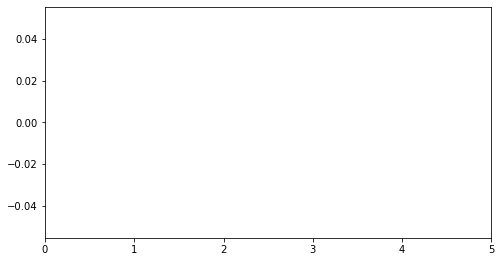

In [9]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


########################################
pup = list(nue_nue_allsel_vars_tot.values())

i = 0
for c in nue_nue_allsel_vars_tot.keys():
    nue_nue_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot.values())

i = 0
for c in nue_nue_allsel_weights_tot.keys():
    nue_nue_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot.values())

i = 0
for c in nue_mc_vars_tot.keys():
    nue_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot.values())

i = 0
for c in nue_mc_weights_tot.keys():
    nue_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot.values())

i = 0
for c in nue_dirt_vars_tot.keys():
    nue_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot.values())

i = 0
for c in nue_dirt_weights_tot.keys():
    nue_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot, nue_mc_vars_tot, nue_dirt_vars_tot]
weightss = [nue_nue_allsel_weights_tot, nue_mc_weights_tot, nue_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
nue_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_vars_tot[str(0)][0],
            weights=nue_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (nue_ext_weights_tot[str(0)][0]) if (nue_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

#print(nue_data_vars_tot[str(0)].values())
#print(type(nue_data_vars_tot[str(0)].values()))


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot[str(0)].values()) if sum(nue_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])


nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

In [ ]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)


print('%.50f' % math.fsum(nue_wanted_list))

#nue_wanted_list = n_nue_tot
#print(nue_wanted_list)
print("")
print(sum(current_total_hist))
#print(sum(sum(n_nue_tot)))

print( math.fsum(nue_wanted_list)/math.fsum(current_total_hist))

In [ ]:



########################################
pup = list(nue_nue_sigsel_vars_tot.values())

i = 0
for c in nue_nue_sigsel_vars_tot.keys():
    nue_nue_sigsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot.values())

i = 0
for c in nue_nue_sigsel_weights_tot.keys():
    nue_nue_sigsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
    
varss = [nue_nue_sigsel_vars_tot]
weightss = [nue_nue_sigsel_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


#current_total_hist = (nue_stacked[0][-1])
current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


nue_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

Sidenote for unfolding

In [ ]:
#Data values
data_values = list(nue_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = nue_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

#print(nue_wanted_list[1:7])

In [ ]:
if isRun3 == False:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')
elif isRun3 == True:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_run3_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

## Now do Numu

IndexError: list index out of range

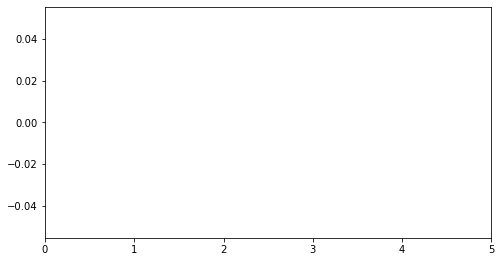

In [10]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


############################################# 
pup = list(numu_mc_allsel_vars_tot.values())

i = 0
for c in numu_mc_allsel_vars_tot.keys():
    numu_mc_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_allsel_weights_tot.values())

i = 0
for c in numu_mc_allsel_weights_tot.keys():
    numu_mc_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot.values())

i = 0
for c in numu_dirt_vars_tot.keys():
    numu_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot.values())

i = 0
for c in numu_dirt_weights_tot.keys():
    numu_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_allsel_vars_tot, numu_dirt_vars_tot]
weightss = [numu_mc_allsel_weights_tot, numu_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
numu_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_vars_tot[str(0)][0],
            weights=numu_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (numu_ext_weights_tot[str(0)][0]) if (numu_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

numu_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

print(numu_data_vars_tot[str(0)].values())
print(type(numu_data_vars_tot[str(0)].values()))

numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=numu_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot[str(0)].values()) if sum(numu_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot

numu_allsel_ax1.set_ylim([0, 1150])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [11]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


wanted_key = 3

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

#numu_wanted_list = n_numu_tot

[]

SUMS
[]
[]

Wanted List:
[]



No handles with labels found to put in legend.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


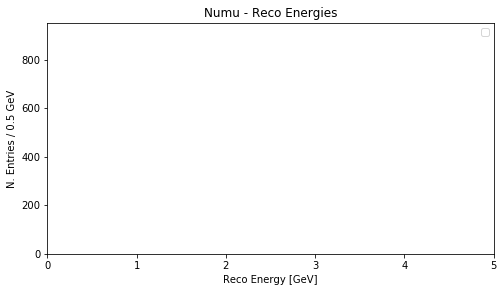

In [12]:



############################################# 
pup = list(numu_mc_sigsel_vars_tot.values())

i = 0
for c in numu_mc_sigsel_vars_tot.keys():
    numu_mc_sigsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot.values())

i = 0
for c in numu_mc_sigsel_weights_tot.keys():
    numu_mc_sigsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
    
varss = [numu_mc_sigsel_vars_tot]
weightss = [numu_mc_sigsel_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0])


numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25


#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0])
print(n_numu_tot)

numu_ax1.set_ylim([0, 950])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

Sidenote for unfolding

In [13]:
#Data values
data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = numu_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

AttributeError: 'list' object has no attribute 'values'

In [14]:
if isRun3 == False and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_run3_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')

### Combined Plots

Nue Combined Plots

[215.53055363  23.30296743  14.65629487   6.59024997   3.98846723
   3.27520477   2.64027246   4.02022308]
[220.97771802  23.30296743  14.65629487   6.59024997   3.98846723
   3.27520477   2.64027246   4.02022308]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


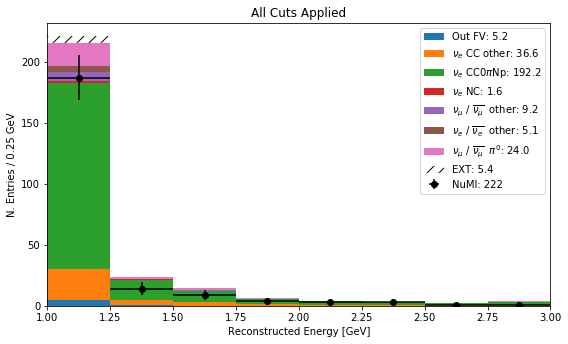

In [82]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


########################################
pup = list(nue_nue_allsel_vars_tot_run1.values())

i = 0
for c in nue_nue_allsel_vars_tot_run1.keys():
    nue_nue_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run1.values())

i = 0
for c in nue_nue_allsel_weights_tot_run1.keys():
    nue_nue_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run1.values())

i = 0
for c in nue_mc_vars_tot_run1.keys():
    nue_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run1.values())

i = 0
for c in nue_mc_weights_tot_run1.keys():
    nue_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run1.values())

i = 0
for c in nue_dirt_vars_tot_run1.keys():
    nue_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run1.values())

i = 0
for c in nue_dirt_weights_tot_run1.keys():
    nue_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
########################################
pup = list(nue_nue_allsel_vars_tot_run3.values())

i = 0
for c in nue_nue_allsel_vars_tot_run3.keys():
    nue_nue_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run3.values())

i = 0
for c in nue_nue_allsel_weights_tot_run3.keys():
    nue_nue_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run3.values())

i = 0
for c in nue_mc_vars_tot_run3.keys():
    nue_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run3.values())

i = 0
for c in nue_mc_weights_tot_run3.keys():
    nue_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run3.values())

i = 0
for c in nue_dirt_vars_tot_run3.keys():
    nue_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run3.values())

i = 0
for c in nue_dirt_weights_tot_run3.keys():
    nue_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot_run1, nue_mc_vars_tot_run1, nue_dirt_vars_tot_run1, nue_nue_allsel_vars_tot_run3, nue_mc_vars_tot_run3, nue_dirt_vars_tot_run3]
weightss = [nue_nue_allsel_weights_tot_run1, nue_mc_weights_tot_run1, nue_dirt_weights_tot_run1, nue_nue_allsel_weights_tot_run3, nue_mc_weights_tot_run3, nue_dirt_weights_tot_run3]
#varss = [nue_nue_allsel_vars_tot_run3]
#weightss = [nue_nue_allsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
nue_allsel_ax1.set_xlim([1, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(1.0, 3.0),"Reco Energy [GeV]"

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

i = 0
nue_ext_var = []
nue_ext_weight = []

for i in range(len(nue_ext_vars_tot_run1[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run1[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(nue_ext_vars_tot_run3[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run3[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run3[str(0)][i])
    i=i+1  

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_var,
            weights=nue_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(nue_ext_weight) if sum(nue_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_allsel_ax1.set_xlim([1, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(1.125, 3.125, 0.25)
current_bin_size = 0.25


i = 0
nue_data_var = []
nue_data_weight = []

while i < 8: 
    nue_data_var.append(nue_data_vars_tot_run1[str(0)][i] + nue_data_vars_tot_run3[str(0)][i])
    nue_data_weight.append(nue_data_weights_tot_run1[str(0)][i] + nue_data_weights_tot_run3[str(0)][i])
    i=i+1


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_var,
            xerr=current_bin_size/2,
            yerr=nue_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_var) if (nue_data_var) else "")


n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot + n_ext
#n_nue_tot = (nue_stacked[0])
print(n_nue_tot_allsel)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])

#nue_allsel_ax1.set_yscale('log')
#nue_allsel_ax1.set_ylim([0, 50])

plt.title("All Cuts Applied")
plt.xlabel("Reconstructed Energy [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()
plt.tight_layout()

In [83]:
total_nue_selected = n_nue_tot_allsel
print("total_nue_selected ", total_nue_selected)

total_nue_selected_noExt = n_nue_tot
print("total_nue_selected_noExt ", total_nue_selected_noExt)

total_nue_selected  [220.97771802  23.30296743  14.65629487   6.59024997   3.98846723
   3.27520477   2.64027246   4.02022308]
total_nue_selected_noExt  [215.53055363  23.30296743  14.65629487   6.59024997   3.98846723
   3.27520477   2.64027246   4.02022308]


192.23689963894037191494135186076164245605468750000000



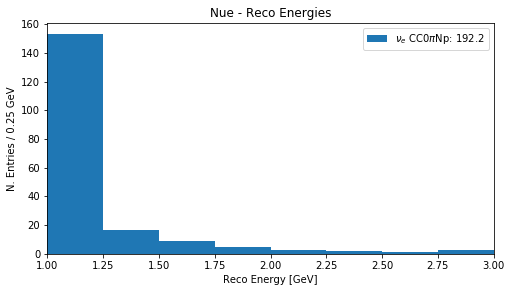

In [84]:



########################################
pup = list(nue_nue_sigsel_vars_tot_run1.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run1.keys():
    nue_nue_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run1.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run1.keys():
    nue_nue_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(nue_nue_sigsel_vars_tot_run3.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run3.keys():
    nue_nue_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run3.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run3.keys():
    nue_nue_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [nue_nue_sigsel_vars_tot_run1, nue_nue_sigsel_vars_tot_run3]
weightss = [nue_nue_sigsel_weights_tot_run1, nue_nue_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([1, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(1.0, 3.0),"Reco Energy [GeV]"

#print(varss_tot[0])

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

nue_ax1.set_xlim([1, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(1.125, 3.125, 0.25)
current_bin_size = 0.25

n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

In [85]:
signal_nue_selected = current_total_hist
print("signal_nue_selected ", signal_nue_selected)

signal_nue_selected  [153.0285153   16.80911415   8.89075628   4.39753427   2.97169856
   2.12752135   1.43865228   2.57310744]


In [86]:
cv_nue_bkg_noExt = total_nue_selected_noExt - signal_nue_selected
print("cv_nue_bkg_noExt ", cv_nue_bkg_noExt)

cv_nue_bkg_incExt = total_nue_selected - signal_nue_selected
print("cv_nue_bkg_incExt ", cv_nue_bkg_incExt)

cv_nue_bkg_noExt  [62.50203832  6.49385328  5.76553859  2.19271569  1.01676867  1.14768342
  1.20162018  1.44711564]
cv_nue_bkg_incExt  [67.94920272  6.49385328  5.76553859  2.19271569  1.01676867  1.14768342
  1.20162018  1.44711564]


In [87]:
#Data values
#data_values = list(nue_data_var[str(0)].values())
data_values = np.array(nue_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot_run1[str(0)][0] + nue_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*8
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_nue_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg


[187  14   9   4   3   3   1   1]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [88]:
if isCombined == True:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot_allsel,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

Numu Combined Plots

{'0': {0: 369, 1: 97, 2: 58, 3: 44, 4: 33, 5: 23, 6: 15, 7: 25}}
[1368.23405965  432.73408525  332.32226634  205.56028741  138.730502
   89.88580266   42.06182149   83.91027959]
[1434.26463865  443.01059307  335.6070573   205.8691979   139.0394125
   90.44701141   42.67964248   83.91027959]


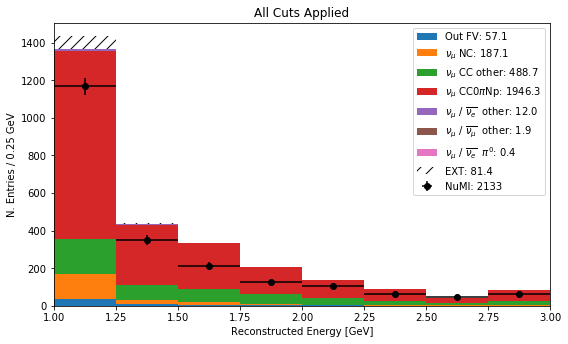

In [89]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


############################################# 
pup = list(numu_mc_allsel_vars_tot_run1.values())

i = 0
for c in numu_mc_allsel_vars_tot_run1.keys():
    numu_mc_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run1.values())

i = 0
for c in numu_mc_allsel_weights_tot_run1.keys():
    numu_mc_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run1.values())

i = 0
for c in numu_nue_vars_tot_run1.keys():
    numu_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run1.values())

i = 0
for c in numu_nue_weights_tot_run1.keys():
    numu_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run1.values())

i = 0
for c in numu_dirt_vars_tot_run1.keys():
    numu_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_dirt_weights_tot_run1.values())

i = 0
for c in numu_dirt_weights_tot_run1.keys():
    numu_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_allsel_vars_tot_run3.values())

i = 0
for c in numu_mc_allsel_vars_tot_run3.keys():
    numu_mc_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run3.values())

i = 0
for c in numu_mc_allsel_weights_tot_run3.keys():
    numu_mc_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run3.values())

i = 0
for c in numu_nue_vars_tot_run3.keys():
    numu_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run3.values())

i = 0
for c in numu_nue_weights_tot_run3.keys():
    numu_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run3.values())

i = 0
for c in numu_dirt_vars_tot_run3.keys():
    numu_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_run3.values())

i = 0
for c in numu_dirt_weights_tot_run3.keys():
    numu_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if (key in dict_1) and (key in dict_2):
            dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    

varss = [numu_mc_allsel_vars_tot_run1, numu_nue_vars_tot_run1, numu_dirt_vars_tot_run1, numu_mc_allsel_vars_tot_run3, numu_nue_vars_tot_run3, numu_dirt_vars_tot_run3]
weightss = [numu_mc_allsel_weights_tot_run1, numu_nue_weights_tot_run1, numu_dirt_weights_tot_run1, numu_mc_allsel_weights_tot_run3, numu_nue_weights_tot_run3, numu_dirt_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
#numu_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(1.0, 3.0),"Reco Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'VtxX',60,(-20.0, 280.0),"VtxX [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'VtxY',56,(-140.0, 140.0),"VtxY [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'VtxZ',56,(-10.0, 1110.0),"VtxZ [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'Muons',5,(0.0, 5.0),"Muons"
#VARIABLE, BINS, RANGE, XTIT = 'Contained',20,(0.0, 1.0),"Contained"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])
#print(current_total_hist)

i = 0
numu_ext_var = []
numu_ext_weight = []

for i in range(len(numu_ext_vars_tot_run1[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run1[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(numu_ext_vars_tot_run3[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run3[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run3[str(0)][i])
    i=i+1    


n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_var,
            weights=numu_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(numu_ext_weight) if sum(numu_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)


numu_allsel_ax1.set_xlim([1, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(1.125, 3.125, 0.25)
current_bin_size = 0.25
#current_bincenters =  np.arange(0.5, 5.5, 1)
#current_bin_size = 1
######################
#numu_allsel_ax1.set_xlim([-20, 280])    #VtxX
#current_bincenters =  np.arange(-17.5, 282.5, 5)
#current_bin_size = 5
######################
#numu_allsel_ax1.set_xlim([-140, 140])    #VtxY
#current_bincenters =  np.arange(-137.5, 142.5, 5)
#current_bin_size = 5
######################
#numu_allsel_ax1.set_xlim([-10, 1110])    #VtxZ
#current_bincenters =  np.arange(0, 1120, 20)
#current_bin_size = 20
######################
#numu_allsel_ax1.set_xlim([0, 1])    #Cont
#current_bincenters =  np.arange(0.025, 1, 0.05)
#current_bin_size = 0.05
########################
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

i = 0
numu_data_var = []
numu_data_weight = []

print(numu_data_vars_tot_run1)

while i < 8: #TrueE
#while i < 60:   #VtxX
#while i < 56:   #VtxY, Z  
#while i < 5:   #Muons, Protons, Showers
#while i < 20:   #Contained, Topo
    numu_data_var.append(numu_data_vars_tot_run1[str(0)][i] + numu_data_vars_tot_run3[str(0)][i])
    numu_data_weight.append(numu_data_weights_tot_run1[str(0)][i] + numu_data_weights_tot_run3[str(0)][i])
    i=i+1


numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_var,
            xerr=current_bin_size/2,
            yerr=numu_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_var) if sum(numu_data_var) else "")


n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot + n_ext
print(n_numu_tot_allsel)

#numu_allsel_ax1.set_ylim([0, 1150])

plt.title("All Cuts Applied")
plt.xlabel("Reconstructed Energy [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()
plt.tight_layout()

In [90]:
total_numu_selected = n_numu_tot_allsel
print("total_numu_selected ", total_numu_selected)

total_numu_selected_noExt = n_numu_tot
print("total_numu_selected_noExt ", total_numu_selected_noExt)

total_numu_selected  [1434.26463865  443.01059307  335.6070573   205.8691979   139.0394125
   90.44701141   42.67964248   83.91027959]
total_numu_selected_noExt  [1368.23405965  432.73408525  332.32226634  205.56028741  138.730502
   89.88580266   42.06182149   83.91027959]


[1001.11347428  319.32667865  240.8852629   141.64017522   97.31332026
   62.39139087   25.55620827   58.10200895]
1946.32851940013620151148643344640731811523437500000000



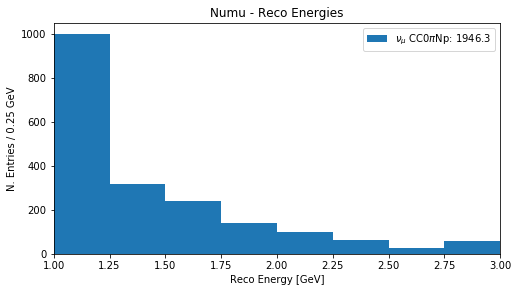

In [91]:



########################################
pup = list(numu_mc_sigsel_vars_tot_run1.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run1.keys():
    numu_mc_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run1.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run1.keys():
    numu_mc_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(numu_mc_sigsel_vars_tot_run3.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run3.keys():
    numu_mc_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run3.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run3.keys():
    numu_mc_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [numu_mc_sigsel_vars_tot_run1, numu_mc_sigsel_vars_tot_run3]
weightss = [numu_mc_sigsel_weights_tot_run1, numu_mc_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([1, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(1.0, 3.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

numu_ax1.set_xlim([1, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(1.125, 3.125, 0.25)
current_bin_size = 0.25

n_numu_tot = (numu_stacked[0])
print(n_numu_tot)


current_total_hist = (numu_stacked[0])
print('%.50f' % math.fsum(numu_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

In [92]:
signal_numu_selected = current_total_hist
print("signal_numu_selected ", signal_numu_selected)

signal_numu_selected  [1001.11347428  319.32667865  240.8852629   141.64017522   97.31332026
   62.39139087   25.55620827   58.10200895]


In [93]:
cv_numu_bkg_noExt = total_numu_selected_noExt - signal_numu_selected
print("cv_nue_bkg_noExt ", cv_nue_bkg_noExt)

cv_numu_bkg_incExt = total_numu_selected - signal_numu_selected
print("cv_numu_bkg_incExt ", cv_numu_bkg_incExt)

cv_nue_bkg_noExt  [62.50203832  6.49385328  5.76553859  2.19271569  1.01676867  1.14768342
  1.20162018  1.44711564]
cv_numu_bkg_incExt  [433.15116438 123.68391441  94.7217944   64.22902269  41.72609224
  28.05562055  17.12343421  25.80827064]


In [94]:
#Data values
#data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(numu_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot_run1[str(0)][0] + numu_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*8
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_numu_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[1167  349  214  127  105   63   46   62]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [95]:
print(n_numu_tot)
print("")
print(n_numu_tot_allsel)

if isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot_allsel,
               delimiter =", ", 
               fmt ='% s')

[1001.11347428  319.32667865  240.8852629   141.64017522   97.31332026
   62.39139087   25.55620827   58.10200895]

[1434.26463865  443.01059307  335.6070573   205.8691979   139.0394125
   90.44701141   42.67964248   83.91027959]


## Ratio Plot

Meaningless before unfolding, so don't bother

## Errors

### Get stat errs

In [96]:
if isCombined == False:
    nue_nue_sigsel_stat_errs = np.array(nue_nue_sigsel_stat_errs)
    nue_nue_notsigsel_stat_errs = np.array(nue_nue_notsigsel_stat_errs)
    nue_mc_stat_errs = np.array(nue_mc_stat_errs)
    nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)
    nue_ext_stat_errs = np.array(nue_ext_stat_errs)

    numu_mc_sigsel_stat_errs = np.array(numu_mc_sigsel_stat_errs)
    numu_mc_notsigsel_stat_errs = np.array(numu_mc_notsigsel_stat_errs)
    numu_nue_stat_errs = np.array(numu_nue_stat_errs)
    numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)
    numu_ext_stat_errs = np.array(numu_ext_stat_errs)


    #numu_detsys_errs = np.array(numu_detsys_errs)
elif isCombined == True:
    nue_nue_sigsel_stat_errs_run1 = np.array(nue_nue_sigsel_stat_errs_run1)
    nue_nue_notsigsel_stat_errs_run1 = np.array(nue_nue_notsigsel_stat_errs_run1)
    nue_mc_stat_errs_run1 = np.array(nue_mc_stat_errs_run1)
    nue_dirt_stat_errs_run1= np.array(nue_dirt_stat_errs_run1)
    nue_ext_stat_errs_run1 = np.array(nue_ext_stat_errs_run1)

    numu_mc_sigsel_stat_errs_run1 = np.array(numu_mc_sigsel_stat_errs_run1)
    numu_mc_notsigsel_stat_errs_run1 = np.array(numu_mc_notsigsel_stat_errs_run1)
    numu_nue_stat_errs_run1 = np.array(numu_nue_stat_errs_run1)
    numu_dirt_stat_errs_run1 = np.array(numu_dirt_stat_errs_run1)
    numu_ext_stat_errs_run1 = np.array(numu_ext_stat_errs_run1)


    #numu_detsys_errs = np.array(numu_detsys_errs)
    ###########################################
    nue_nue_sigsel_stat_errs_run3 = np.array(nue_nue_sigsel_stat_errs_run3)
    nue_nue_notsigsel_stat_errs_run3 = np.array(nue_nue_notsigsel_stat_errs_run3)
    nue_mc_stat_errs_run3 = np.array(nue_mc_stat_errs_run3)
    nue_dirt_stat_errs_run3 = np.array(nue_dirt_stat_errs_run3)
    nue_ext_stat_errs_run3 = np.array(nue_ext_stat_errs_run3)

    numu_mc_sigsel_stat_errs_run3 = np.array(numu_mc_sigsel_stat_errs_run3)
    numu_mc_notsigsel_stat_errs_run3 = np.array(numu_mc_notsigsel_stat_errs_run3)
    numu_nue_stat_errs_run3 = np.array(numu_nue_stat_errs_run3)
    numu_dirt_stat_errs_run3 = np.array(numu_dirt_stat_errs_run3)
    numu_ext_stat_errs_run3 = np.array(numu_ext_stat_errs_run3)


    #numu_detsys_errs = np.array(numu_detsys_errs)

### Expected Error Calculations

In [97]:
# Merge the backgrounds from nue and mc stat errors
if isCombined == False:
    errs = [nue_nue_notsigsel_stat_errs, nue_mc_stat_errs]
elif isCombined == True:
    errs = [nue_nue_notsigsel_stat_errs_run1, nue_mc_stat_errs_run1, nue_nue_notsigsel_stat_errs_run3, nue_mc_stat_errs_run3]    

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs nue = ", total_errs)
print("")

nue_nue_mc_bkg_stat_errs = total_errs

#####################################################
if isCombined == False:
    errs = [numu_mc_notsigsel_stat_errs, numu_nue_stat_errs]
elif isCombined == True:
    errs = [numu_mc_notsigsel_stat_errs_run1, numu_nue_stat_errs_run1, numu_mc_notsigsel_stat_errs_run3, numu_nue_stat_errs_run3]    

    #arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
    masterlist = []
    templist = []
    for i in range((len(errs[0]))):
        masterlist.append(templist)
        templist = []
        for j in range(len(errs)):
            templist.append(errs[j][i])
    masterlist.append(templist)

    masterlist.pop(0)

    #deal with adding the errors in each bin
    total_errs = []
    holdlist = []
    for f in masterlist:
        total_errs.append(sum(holdlist))
        #print("------------------------------")
        holdlist = []
        for g in f:
            #just add them as they differnt parts of the same total number. This then matches previous when doing total
            holdlist.append(g)
    total_errs.append(sum(holdlist))

    total_errs.pop(0)
    numu_nue_mc_bkg_stat_errs = total_errs


print("total errs numu = ", numu_nue_mc_bkg_stat_errs)

total errs nue =  [9.607074000019416, 0.8327833200735302, 1.0343596497131848, 0.22156561891929807, 0.019877904635295214, 0.14059355392529643, 0.1869326231223648, 0.16950861929755218]

total errs numu =  [106.63799964974895, 27.33382520016463, 30.91202095433045, 27.49202617870906, 34.370672199473766, 17.927649885595976, 9.716413439819137, 5.433644271529085]


In [98]:
#Don't the ext values were rooted before, square them to combine!


if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    #totalstat_nue = totalstat_nue
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("nue_bkg_exp_err_squared_energy_"+ending+".csv", 
                   nue_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")
    
    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("numu_bkg_exp_err_squared_energy_"+ending+".csv", 
                   numu_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs_run1 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    nue_sig_only_err = nue_nue_sigsel_stat_errs_run1 + nue_nue_sigsel_stat_errs_run3

    if (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("nue_sig_only_err_squared_energy_comb_"+ending+".csv", 
                   nue_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("nue_total_noTune_err_squared_energy_comb_"+ending+".csv", 
                   totalstat_nue,
                   delimiter =", ", 
                   fmt ='% s')   

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")

    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs_run1 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    numu_sig_only_err = numu_mc_sigsel_stat_errs_run1 + numu_mc_sigsel_stat_errs_run3

    if (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("numu_sig_only_err_squared_energy_comb_"+ending+".csv", 
                   numu_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("numu_total_noTune_err_squared_energy_comb_"+ending+".csv", 
                   totalstat_numu,
                   delimiter =", ", 
                   fmt ='% s')   
   


totalstat_nue  [26.7239708   2.2448204   1.55713956  0.37882524  0.15912238  0.19774219
  0.29407827  0.22896632]
nue_exp_err  [5.16952327 1.49827247 1.24785398 0.61548781 0.39890146 0.44468212
 0.54228984 0.47850426]

nue_bkg_exp_err  [15.13716704  0.83278332  1.03435965  0.22156562  0.0198779   0.14059355
  0.18693262  0.16950862]

totalstat_numu  [1093.81063836  407.6950158   404.18640451  199.95846033  173.99564315
  124.75714442   22.43477239   92.25813171]
numu_exp_err  [33.07280814 20.19145898 20.10438769 14.1406669  13.19074081 11.16947378
  4.73653591  9.60510967]

numu_bkg_exp_err  [177.31901429  37.83604715  34.30535336  27.84771726  34.7026254
  18.4897107   10.33423442   5.43364427]


## For Blockwise Unfolding

Data (MC) Values

In [99]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [153.0285153   16.80911415   8.89075628   4.39753427   2.97169856
   2.12752135   1.43865228   2.57310744]


In [100]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [1001.11347428  319.32667865  240.8852629   141.64017522   97.31332026
   62.39139087   25.55620827   58.10200895]


In [101]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[ 153.0285153    16.80911415    8.89075628    4.39753427    2.97169856
    2.12752135    1.43865228    2.57310744 1001.11347428  319.32667865
  240.8852629   141.64017522   97.31332026   62.39139087   25.55620827
   58.10200895]
16


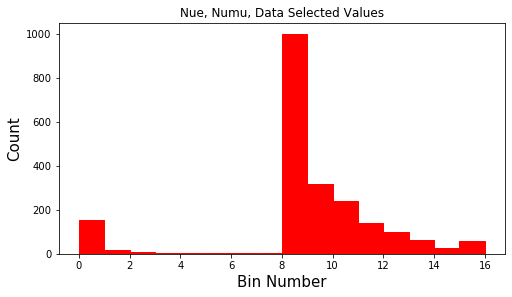

In [102]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

In [103]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')    

Systematics

In [104]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

ending = "Dec19"

In [105]:
if isRun3 == False and isCombined == False:

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')


    #####################################################################################


    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')


    #####################################################################################


    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

elif isRun3 == True and isCombined == False:
    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

    #####################################################################################
    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------


    #####################################################################################

  
    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict = nue_dirt_genie_detvar_dict.to_dict('series')


elif isCombined == True:

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run1 = nue_nue_genie_detvar_dict.to_dict('series')

    #####################################################################################

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run1 = nue_mc_genie_detvar_dict.to_dict('series')


    #####################################################################################

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run1 = nue_dirt_genie_detvar_dict.to_dict('series')

#############################################################################################################

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run3 = nue_nue_genie_detvar_dict.to_dict('series')

    #####################################################################################

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run3 = nue_mc_genie_detvar_dict.to_dict('series')


    #####################################################################################

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run3 = nue_dirt_genie_detvar_dict.to_dict('series')


In [106]:
if isRun3 == False and isCombined == False:


    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')


    #####################################################################################


    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict = numu_dirt_genie_detvar_dict.to_dict('series')


    #####################################################################################


    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict = numu_nue_genie_detvar_dict.to_dict('series')


elif isRun3 == True and isCombined == False:

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    #####################################################################################

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict = numu_dirt_genie_detvar_dict.to_dict('series')


        #####################################################################################


    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------


elif isCombined == True:

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run1 = numu_mc_genie_detvar_dict.to_dict('series')


    #####################################################################################

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run1 = numu_dirt_genie_detvar_dict.to_dict('series')


    #####################################################################################

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run1 = numu_nue_genie_detvar_dict.to_dict('series')


#################################################################################################################

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run3 = numu_mc_genie_detvar_dict.to_dict('series')


    #####################################################################################

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run3 = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------
    #####################################################################################

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run3 = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

In [107]:
if isCombined == True:
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    pup = [nue_nue_genie_detvar_dict_run1, nue_nue_genie_detvar_dict_run3 ]
    nue_nue_genie_detvar_dict = combine_dicts(pup)[0]
    
    
    #############
    

    pup = [nue_mc_genie_detvar_dict_run1, nue_mc_genie_detvar_dict_run3 ]
    nue_mc_genie_detvar_dict = combine_dicts(pup)[0]
    
    
    #############
    
    pup = [nue_dirt_genie_detvar_dict_run1, nue_dirt_genie_detvar_dict_run3 ]
    nue_dirt_genie_detvar_dict = combine_dicts(pup)[0]
    
    
    #############
    #############
    

    pup = [numu_mc_genie_detvar_dict_run1, numu_mc_genie_detvar_dict_run3 ]
    numu_mc_genie_detvar_dict = combine_dicts(pup)[0]
    
    #############    
    
    pup = [numu_dirt_genie_detvar_dict_run1, numu_dirt_genie_detvar_dict_run3 ]
    numu_dirt_genie_detvar_dict = combine_dicts(pup)[0]
    
    #############    
    
    pup = [numu_nue_genie_detvar_dict_run1, numu_nue_genie_detvar_dict_run3 ]
    numu_nue_genie_detvar_dict = combine_dicts(pup)[0]
    

In [108]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, NUnis, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = NUnis
    print('contribution = 1/', N)

    #####################################################
    
    for k in range(len(uni_counts)): 
        
        uni = uni_counts[k]
        #print("uni = ", uni)

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]
            #print("uvi = ", uvi)

            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                #print("ncv_total[i]*ncv_total[j] ", ncv_total[i]*ncv_total[j])
                #print(ncv_total[i])
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

Mc dataframe

[1.125 1.375 1.625 1.875 2.125 2.375 2.625 2.875]
[1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
[3.55674229e+01 2.01411426e+00 2.46593475e+00 8.76731694e-01
 0.00000000e+00 5.58506794e-01 7.09360242e-01 5.44382378e-01
 1.12936450e+03 3.58567177e+02 2.59720993e+02 1.62063526e+02
 1.09762857e+02 7.06559067e+01 3.65439491e+01 6.90141106e+01]


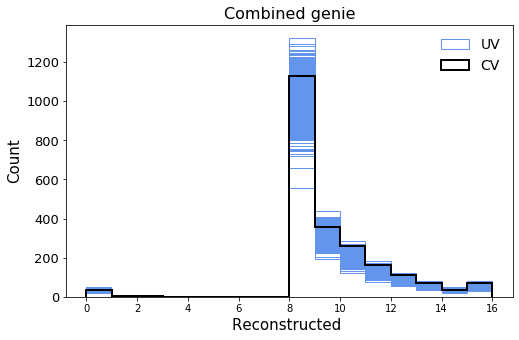

In [109]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(1.125, 3.125, 0.25)
bins = np.arange(1, 3.25, 0.25)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [110]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
c

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [111]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8052/2988810523.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8052/2988810523.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


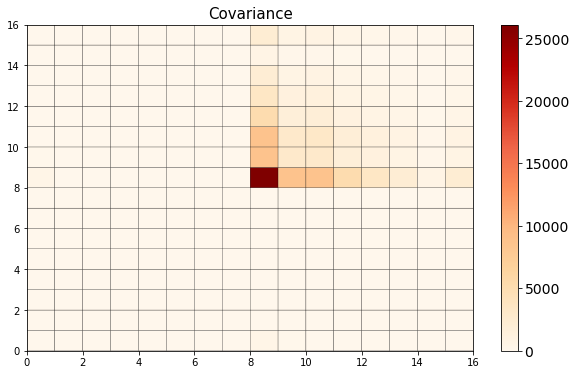

In [112]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

Dirt dataframe

[1.125 1.375 1.625 1.875 2.125 2.375 2.625 2.875]
[1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
[0.38557488 0.         0.         0.         0.         0.
 0.         0.         7.55518746 0.91810942 0.48216413 0.21628819
 0.21315534 0.02918995 0.         0.        ]


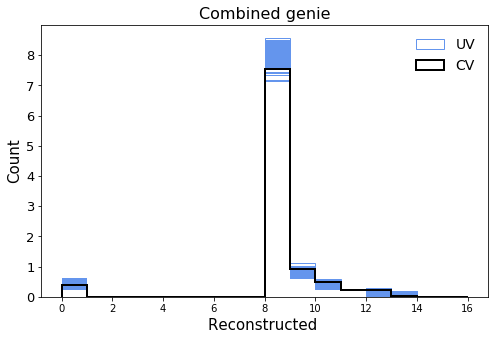

In [113]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(1.125, 3.125, 0.25)
bins = np.arange(1, 3.25, 0.25)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [114]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
c

In [115]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8052/1668627413.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8052/1668627413.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


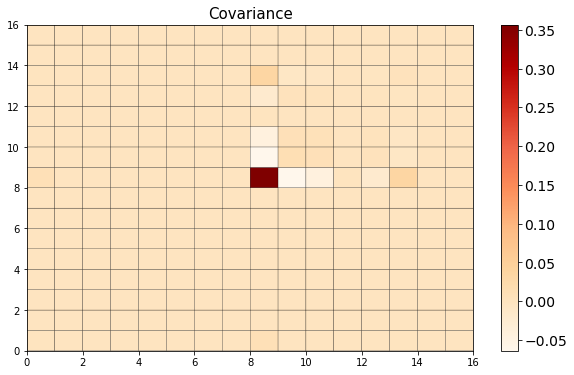

In [116]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

Nue Dataframe

[1.125 1.375 1.625 1.875 2.125 2.375 2.625 2.875]
[1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
[1.43837902e+02 1.65810618e+01 9.88098931e+00 4.92371094e+00
 3.44715357e+00 2.41706860e+00 1.55501428e+00 3.11167270e+00
 3.74494052e+00 1.04005814e+00 2.74441563e-01 1.71108134e-01
 3.40791829e-02 1.06465826e-01 8.50238837e-03 1.25058545e-01]


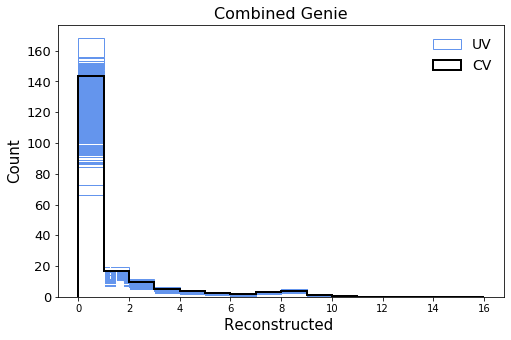

In [117]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(1.125, 3.125, 0.25)
bins = np.arange(1, 3.25, 0.25)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_nue_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_nue_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_nue_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_nue_genie_detvar_dict['CV'], color='white') 

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined Genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [118]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
c

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [119]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8052/621654353.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8052/621654353.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


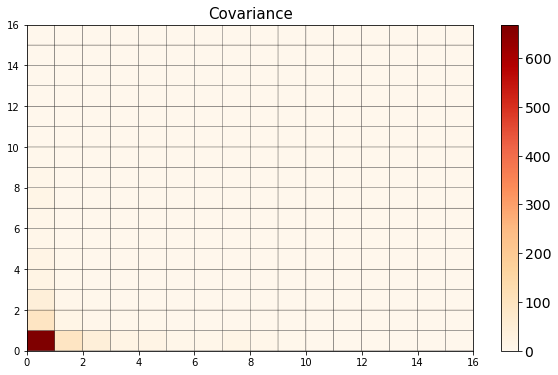

In [120]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

Now add everything together

In [121]:
blockwise_cov_genie_only = np.array(detsys_dict_nue_genie['cov']) + np.array(detsys_dict_dirt_genie['cov']) + np.array(detsys_dict_mc_genie['cov']) 
print(blockwise_cov_genie_only)
#GENIE NOT GEO

#print(detsys_dict_dirt_genie['cov'])

[[ 7.02584754e+02  9.66961224e+01  4.72505820e+01  1.95653861e+01
   1.55394334e+01  8.94111218e+00  9.28134248e+00  1.34670857e+01
   4.71351688e+02  1.38674156e+02  8.23006911e+01  5.31638324e+01
   3.38088659e+01  2.03134134e+01  1.56197023e+01  2.35509042e+01]
 [ 9.66961224e+01  1.41866669e+01  6.55743105e+00  2.65187422e+00
   2.23032423e+00  1.19496853e+00  1.29913089e+00  1.87508348e+00
   3.33971308e+00  3.40906010e-01 -3.90257578e+00 -2.07148673e+00
  -1.48469940e+00 -8.33071089e-01  5.01995680e-01 -9.37515310e-01]
 [ 4.72505820e+01  6.55743105e+00  3.64302075e+00  1.39455931e+00
   1.07560765e+00  6.63893934e-01  6.43107645e-01  9.02718599e-01
   2.86365182e+01  1.12475099e+01  4.76837143e+00  3.80393571e+00
   2.37646504e+00  1.35923712e+00  1.84784207e+00  1.80189479e+00]
 [ 1.95653861e+01  2.65187422e+00  1.39455931e+00  6.61086878e-01
   4.69503414e-01  3.01099636e-01  2.41223780e-01  4.21723566e-01
   1.81158248e+01  6.22601207e+00  5.45933666e+00  3.35201679e+00
   2.25

/tmp/ipykernel_8052/1207631039.py:3: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(blockwise_cov_genie_only), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


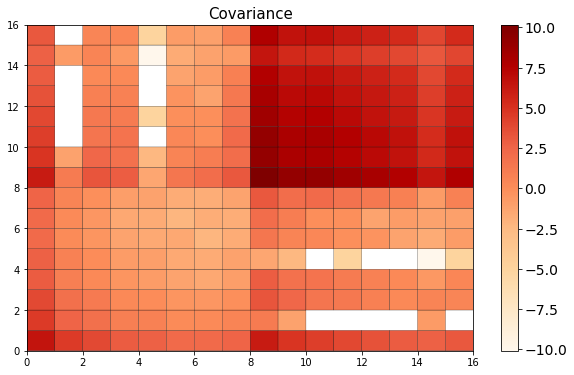

In [122]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, np.log(blockwise_cov_genie_only), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [123]:
if isCombined == False and isRun3 == False:
    np.savetxt("blockwise_cov_genie_only_RecoE_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  
elif isCombined == True:
    np.savetxt("blockwise_cov_genie_only_RecoE_comb_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  